<a href="https://colab.research.google.com/github/wesnasimone/IA901-Processamento_Imagens_Segmentacao/blob/main/Histogramas/Ex02_225843.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###########################################

          Nome: Wesna Simone Bulla de Araujo
          RA: 225843
          Curso: EA098/IA901

##########################################

# Ex02 - Histograma e Extração de Características

Esta atividade tem 2 objetivos principais:
  - entender o conceito de histograma e estatísticas da imagem
  - explorar diferentes formas de extração de características em histogramas e sua aplicação em um problema de classificação.

## Parte 1 - Histograma

Leia o notebook [Histograma de imagens](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/05_Histograma_da_imagem.ipynb) para entender o conceito de histograma e o uso da função *np.histogram*. Tente também entender a função a seguir, que plota o histograma usando gráfico de barras. Essa função será muito útil nos exercícios deste notebook.

In [ ]:
def plota_hist(h,cor,nbins,bin_edges):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    plt.bar(bin_centers, h, width=w, color=cor)
    #plt.title('Historama da imagem: %s bins' % (nbins))

### Exercício 2.1.1

Vamos tentar calcular o histograma de imagens coloridas. Use as 2 imagens da pasta **IA901A_Ex02/1** e plote os histogramas de cada uma das bandas usando gráficos de barras. Compare visualmente os histogramas e comente as principais diferenças. Se você tivesse que dizer quais histogramas pertencem a qual das 2 imagens, você seria capaz de acertar? Explique porque?


In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import os
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex02/1/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


unicamp_dia.jpg
unicamp_noite.jpg


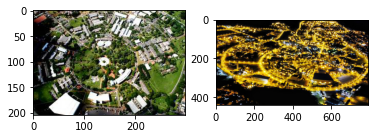

In [ ]:
list_files = os.listdir("gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex02/1")
for i, file in enumerate(list_files):
  print(file)
  plt.subplot(121+i)
  img = mpimg.imread(path+file)
  plt.imshow(img)

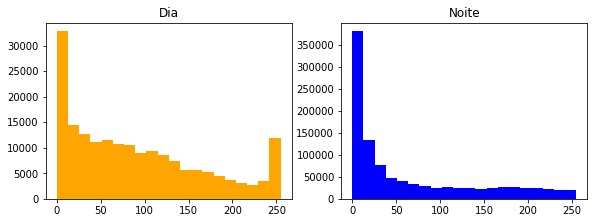

In [ ]:
# HISTOGRAMAS

imagens_coloridas = []
nome_imagem = []
titulo_colorida = ['Dia', 'Noite']

# armazena as imagens e seus nomes em vetores
for i, file in enumerate(list_files):
  nome_imagem.append(file)
  img_color = mpimg.imread(path+file)
  imagens_coloridas.append(img_color)

# plota um histograma para cada imagem
nbins = 20 # numero de colunas do histograma
figura = plt.figure(figsize=(15,11))
for c in range(len(imagens_coloridas)):
  h, bin_edges = np.histogram(imagens_coloridas[c] , nbins, (0,255))
  a = figura.add_subplot(3,3,c+1)
  a.title.set_text(titulo_colorida[c])
  if c < 1:
    color = 'orange'
  else:
    color = 'blue'
  plota_hist(h,color,nbins,bin_edges)
plt.show()

##Analisando...
Ao observar os histogramas percebe-se que o histograma referente a imagem de dia possui uma concentração maior de pixels em regiões de mais brilho, mesmo tendo também componentes em regiões mais escuras. Já para o histograma relacionado a imagem de noite, embora tenha-se valores em toda a faixa analisada há uma quantidade mais significativa de pixels nas regiões de pouco brilho. Assim, se os histogramas não estivessem nomeados seria possível distingui-los, pois a imagem diurna possui muito mais pixels concentrados no meio da faixa de valores analisados do que a imagem noturna, que possui destaque na faixa entre 0-50.

### Exercício 2.1.2

Usando as mesmas imagens coloridas do item anterior, faça a conversão para níveis de cinza, usando um dos métodos abaixo:
   - médias das bandas R, G, B;
   - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;
   - convert(L) da biblioteca PIL;

Em seguida, calcule o histograma da imagem convertida para níveis de cinza. Compare os histogramas em níveis de cinza e discuta novamente as diferenças.   

In [ ]:
# CONVERSÃO PARA NÍVEIS DE CINZA --> http://www.lps.usp.br/hae/apostila/basico-ead.pdf
lista_imagens = []

for i in range(len(nome_imagem)):
  img = mpimg.imread(path+nome_imagem[i])

  #metodo média RGB
  img_rgb = (img[:,:,0] + img[:,:,1] + img[:,:,2])/3
  lista_imagens.append(img_rgb)

  #metodo média RGB ponderada --> note que a cor verde possui peso maior, pois é mais sensível ao olho humano
  img_rgb_pond = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2])
  lista_imagens.append(img_rgb_pond)

  #método convert(L)
  img_cinza = Image.open(path+nome_imagem[i])
  img_cinza = img_cinza.convert('L')
  lista_imagens.append(img_cinza)

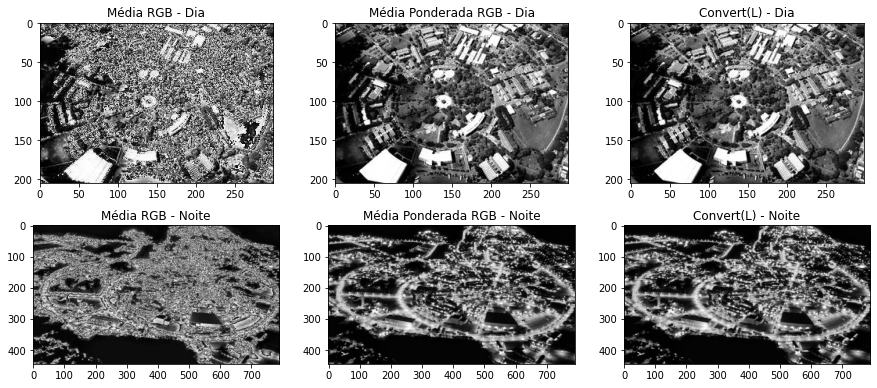

In [ ]:
# Plota imagens
titulos = ['Média RGB - Dia', 'Média Ponderada RGB - Dia', 'Convert(L) - Dia', 'Média RGB - Noite', 'Média Ponderada RGB - Noite', 'Convert(L) - Noite']
figura = plt.figure(figsize=(15,10))
for c in range(len(lista_imagens)):
  a = figura.add_subplot(3,3,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(lista_imagens[c], cmap='gray')
plt.show()

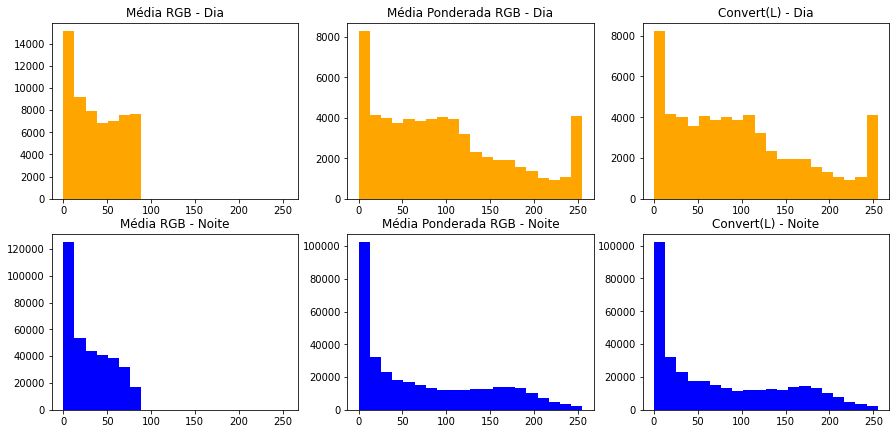

In [ ]:
# Histogramas
nbins = 20
figura = plt.figure(figsize=(15,11))
for c in range(len(lista_imagens)):
  h, bin_edges = np.histogram(lista_imagens[c] , nbins,(0,255))
  a = figura.add_subplot(3,3,c+1)
  a.title.set_text(titulos[c])
  if c < 3:
    color = 'orange'
  else:
    color = 'blue'
  plota_hist(h,color,nbins,bin_edges)
plt.show()

## Analisando...

Entre os tipos de conversão para a escala cinza percebe-se que o método de média simples perde informações ao longo do histograma, o que faz com que tanto a imagem de dia quanto a imagem de noite fiquem concentradas na faixa de pouco brilho o que de certa forma pode prejudicar a etapa de classificação. Já para os métodos de média ponderada e convert(L), ambos com resultados muito parecidos, um histograma semelhante ao caso das imagens coloridas é gerado permitindo uma melhor classificação entre as imagens de dia (com mais intensidade na faixa de mais brilho do histograma) e de noite (com intensidade baixa na faixa de mais brilho do histograma).

## Parte 2 - Extraindo atributos derivados do histograma

Histogramas podem ser utilizados para extrair atributos de imagens. Estes dados são úteis em tarefas de aprendizado de máquina, como a classificação de imagens.

Dentre os atribitos mais comuns usados para a classificação de imagens, estão: *média*, *variância*, *assimetria* e *curtose*.

A função abaixo calcula, dada uma imagem, o histograma e seus atributos. Além dos atributos listados acima, ela também calcula os percentis 1, 10, 50, 90, 99 e 100%.



In [ ]:
def histstat(f):
    import numpy as np

    h, bin_edges = np.histogram(f, 256, (0,255))
    hn = 1.0*h/h.sum() # compute the normalized image histogram
    cum_hn = np.cumsum(hn) # compute the cumulative image histogram
    v = np.zeros(9) # number of statistics

    # compute statistics
    n = len(h) # number of gray values
    v[0]  = np.sum((np.arange(n)*hn)) # mean
    v[1]  = np.sum(np.power((np.arange(n)-v[0]),2)*hn) # variance
    v[2]  = np.sum(np.power((np.arange(n)-v[0]),3)*hn)/(np.power(v[1],1.5))# skewness
    v[3]  = np.sum(np.power((np.arange(n)-v[0]),4)*hn)/(np.power(v[1],2))-3# kurtosis
    v[4] = np.where(cum_hn >= 0.01)[0][0] # 1% percentile
    v[5] = np.where(cum_hn >= 0.1)[0][0] # 10% percentile
    v[6] = np.where(cum_hn >= 0.5)[0][0] # 50% percentile
    v[7] = np.where(cum_hn >= 0.9)[0][0] # 90% percentile
    v[8] = np.where(cum_hn >= 0.99)[0][0] # 99% percentile

    return v

Se quisermos então extrair os atributos do histograma de uma das imagens anteriores, basta fazermos:

In [ ]:
f = mpimg.imread(path+"unicamp_noite.jpg")
f_gray = np.uint8(0.3*f[:,:,0]+0.59*f[:,:,1]+0.11*f[:,:,2])
hist_features = histstat(f_gray)
for feature in hist_features:
  print(f'{feature:.2f}')


74.39
5046.65
0.65
-0.90
0.00
3.00
51.00
184.00
236.00


### Exercício 2.2.1

Extraia agora os atributos da segunda imagem de exemplo e compare com os da primeira imagem. Eles parecem suficientemente diferentes para distinguir uma da outra?

In [ ]:
# COMPARA ATRIBUTOS DAS IMAGENS DIA E NOITE

import pandas as pd

f_dia = mpimg.imread(path+"unicamp_dia.jpg")
f_dia_gray = np.uint8(0.3*f_dia[:,:,0]+0.59*f_dia[:,:,1]+0.11*f_dia[:,:,2])
hist_features_dia = histstat(f_dia_gray)

# Tabela de comparação
atributos = ['Média', 'Variancia', 'Assimetria', 'Curtose', 'Percentil (1%)', 'Percentil (10%)', 'Percentil (50%)', 'Percentil (90%)', 'Percentil (99%)']
tabela_1 = pd.DataFrame( hist_features, columns=['Noite'])
tabela_2 = pd.DataFrame( hist_features_dia, columns=['Dia'])
tabela_3 = pd.DataFrame(atributos, columns=[''])
m = pd.concat([tabela_1, tabela_2], axis=1)
m = pd.concat([tabela_3, m], axis=1)
m

,,Noite,Dia
0,Média,74.390287,96.583539
1,Variancia,5046.645147,5459.878815
2,Assimetria,0.654504,0.606099
3,Curtose,-0.903402,-0.598812
4,Percentil (1%),0.000000,0.000000
5,Percentil (10%),3.000000,7.000000
6,Percentil (50%),51.000000,85.000000
7,Percentil (90%),184.000000,215.000000
8,Percentil (99%),236.000000,254.000000


## Analisando...

Observando os atributos extraídos do histograma da imagem de noite e de dia, percebe-se que no geral os valores são bastante próximos entre sí. No entanto, há alguns atributos que se diferem um pouco mais, como por exemplo, Média e os Percentils, o que pode contribuir com o processo de classificação.

## Parte 3 - Classificação de imagens utilizando atributos derivados do histograma

### Exemplo - O classificador dos K-vizinhos mais próximos (KNN ou K-Nearest Neighbors)

[KNN (K-Nearest Neighbors)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) é um algoritmo de classificação que usa uma abordagem baseada em instâncias, ou seja, ele classifica uma nova amostra com base nas amostras mais próximas (vizinhas) a ela. O KNN se baseia na suposição de que amostras próximas no espaço de atributos estão mais propensas a pertencer à mesma classe.

Para classificar imagens usando o algoritmo KNN, primeiro o conjunto de dados de treinamento é utilizado para construir uma representação dos dados que permita a busca dos vizinhos mais próximos.

Em seguida, para classificar uma nova amostra, o algoritmo encontra as K amostras mais próximas na representação construída, em que K é um parâmetro definido pelo usuário.

Por fim, a classe da nova amostra é determinada pela classe mais comum entre os vizinhos encontrados.



###Exemplo de uso do KNN:

Um conjunto de dados de duas classes é gerado aleatoriamente e, em seguida, o modelo KNN é treinado com k=5 vizinhos próximos. Note que a função **KNeighborsClassifier()** foi importada da biblioteca **sklearn.neighbors** e foi utilizada para criar o modelo KNN. A função *fit()* foi utilizada para treinar o modelo

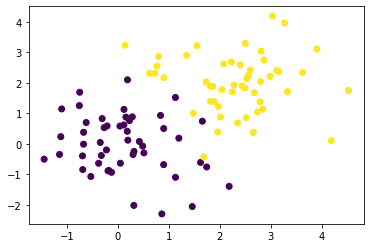

KNeighborsClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Geração de dados aleatórios
np.random.seed(1)
X1 = np.random.randn(50, 2)  # 50 amostras da classe 1
X2 = np.random.randn(50, 2) + 2  # 50 amostras da classe 2
X = np.concatenate((X1, X2))
y = np.concatenate((np.zeros(50), np.ones(50))) # rótulos das classes (0 e 1)

# Visualizando as amostras (coloridas por classe)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# Criando o modelo KNN
model = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo
model.fit(X, y)


Em seguida, novas amostras aleatórias foram criadas para teste e o modelo foi utilizado para classificá-las.

A função *predict()* é utilizada para classificar as novas amostras.



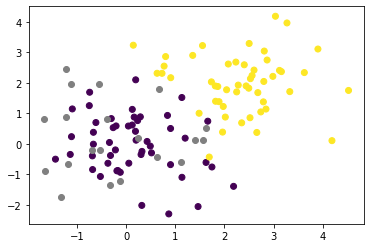

In [ ]:
# Criando novas amostras aleatórias para teste
X_test = np.random.randn(20, 2)

#  Visualizando o conjunto de teste
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(X_test[:,0],X_test[:,1],c='gray')
plt.show()

# Classificando as amostras
y_pred = model.predict(X_test)



Para avaliar a qualidade de um classificador, normalmente se utiliza as seguintes métricas:

- [Acurácia (accuracy_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): mede a proporção de amostras classificadas corretamente pelo modelo.
- [Precisão (precision_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): mede a proporção de amostras classificadas como positivas (1) que são realmente positivas.
- [Recall (recall_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): mede a proporção de amostras positivas (1) que são corretamente identificadas pelo modelo.
- [F1-Score]() (f1_score): média harmônica entre precisão e recall.

Atenção: para avaliar o modelo, as métricas foram calculadas em relação às amostras de treinamento, o que **não** é o ideal em um cenário real de classificação. No entanto, para fins didáticos, pode-se utilizar essas métricas para avaliar o desempenho do modelo.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Avaliando o modelo
acc = accuracy_score(y, model.predict(X))
prec = precision_score(y, model.predict(X))
rec = recall_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))

# Imprimindo as métricas
print('Acurácia: %.2f' % acc)
print('Precisão: %.2f' % prec)
print('Recall: %.2f' % rec)
print('F1-Score: %.2f' % f1)

Acurácia: 0.96
Precisão: 0.94
Recall: 0.98
F1-Score: 0.96


Para fazer uma avaliação qualitativa do classificador, podemos plotar os resultados da classificação utilizando a função [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) do matplotlib. As amostras de treinamento são plotadas com pontos circulares, enquanto as amostras de teste são plotadas com pontos cruzados.


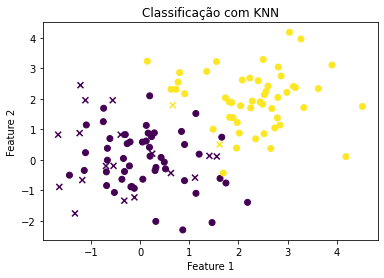

In [ ]:

# Plotando os resultados
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_pred)
plt.title('Classificação com KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Exercício 2.3.1

Vamos agora usar o mesmo classificador KNN para classificar imagens. Nesse caso, ao invés de utilizar dados aleatórios para treinamento e teste, vamos extrair os atributos dos histogramas gerados pelos conjuntos de imagens utilizados para treino e teste. Os atributos serão utilizadas como dados de entrada do modelo. As imagens devem ser classificadas em "dia" e "noite".

O código abaixo cria os conjuntos de treino e teste (imagens e labels) utilizando as imagens disponíveis na pasta abaixo. Para cada classe (dia e noite), dividimos 5 imagens para treino (images_train e labels_train) e 4 imagens para teste (images_test e labels_test).

Observem que:
- Para criação das labels, utilizamos o método [split()](https://python-reference.readthedocs.io/en/latest/docs/str/split.html) no nome da imagem, utilizado como separador "_".
- Verificamos o nome da classe e atribuimos um valor inteiro para diferenciar cada uma.

In [ ]:
files = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex02/2/"

list_files = os.listdir(files)
all_images = []
all_labels = []
for file in list_files:
  print((file))
  img = mpimg.imread(files+file)
  all_images.append((img))
  if file.split("_")[0]=="day": all_labels.append(0)
  else: all_labels.append(1)

images_train = all_images[0:3]+all_images[11:]
labels_train = all_labels[0:3]+all_labels[11:]
images_test = all_images[3:11]
labels_test = all_labels[3:11]

#print(f'images_train: \n{images_train}')
print(f'labels_train: \n{labels_train}')
#print(f'images_test: \n{images_test}')
print(f'labels_test: \n{labels_test}')

day_1.jpeg
day_2.jpeg
day_3.jpeg
day_4.jpeg
day_5.jpeg
day_6.jpg
day_7.jpeg
night_1.jpg
night_2.jpg
night_3.jpg
night_4.jpg
night_5.gif
night_6.jpg
night_7.jpg
day_8.jpg
day_9.jpg
night_8.jpg
night_9.jpg
labels_train: 
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
labels_test: 
[0, 0, 0, 0, 1, 1, 1, 1]


**a)** Crie uma função que receba um conjunto de imagens RGB, transforme as imagens em *grayscale*, e extraia os atributos do histograma de cada imagem. A função deve retornar os atributos dos histogramas concatenados em um vetor de atributos. Utilize a função dada na Parte 1 desse notebook para extração de atributos.

Utilize os conjuntos de dados do item anterior para obter os vetores de atributos para os conjunto de treino e teste (train_features e test_features).

**Atenção!** Para o conjunto de treino você deve obter uma matriz 10 x 9, onde cada linha corresponde a uma amostra (imagem) e cada coluna correponde a um atributo do histograma. Da mesma forma, para o conjunto de teste você deve obter uma matriz 8 x 9.

In [ ]:
# Função que transforma imagens para a escala cinza e calcula os atributos da imagem através de um histograma

def vetor_atributos(imagens):
  features = []
  tam = len(imagens)

  for c in range(tam):
    img = imagens[c]
    img_rgb_gray = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2])       #transforma a imagem para escala cinza

    hist_features = histstat(img_rgb_gray)                                        #calcula atributos
    features.append(hist_features)

  return features

# Atributos para os conjuntos de treino e teste
train_features = vetor_atributos(images_train)
test_features = vetor_atributos(images_test)
print(np.shape(train_features))
print(np.shape(test_features))

(10, 9)
(8, 9)


**b)** Treine um modelo kNN utilizando o conjunto de dados de treino criado (train_features). Você precisará escolher um valor de k. Valide o modelo utilizando o conjunto de dados de teste (test_features). Calcule as métricas de avaliação do classificador para ambos os conjuntos de dados (primeiro para treino, depois para teste): acurácia, precisão, revocação e F1-score. Imprima a [Matriz de Confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


In [ ]:
# TREINANDO O MODELO --> escolheu-se k=3 levando em consideração a quantidade de amostras disponíveis (3/10)

# Criando o modelo KNN
model = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
model.fit(train_features, labels_train)

# Classificando as amostras
y_pred = model.predict(test_features)

In [ ]:
# Função que calcula métricas para avaliar o desempenho do modelo
def metricas(X, y):
  desempenho = []

  acc = accuracy_score(y, model.predict(X))
  prec = precision_score(y, model.predict(X))
  rec = recall_score(y, model.predict(X))
  f1 = f1_score(y, model.predict(X))

  desempenho.append(acc)
  desempenho.append(prec)
  desempenho.append(rec)
  desempenho.append(f1)

  return desempenho

desempenho_treino = metricas(train_features, labels_train)
desempenho_teste = metricas(test_features, labels_test)

# Compara o desempenho do modelo utilizando o próprio conjunto de treino e o conjunto de teste
metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
metrica_1 = pd.DataFrame(desempenho_treino, columns=['Treino'])
metrica_2 = pd.DataFrame(desempenho_teste, columns=['Teste'])
metrica_3 = pd.DataFrame(metricas, columns=[''])
df = pd.concat([metrica_1, metrica_2], axis=1)
df = pd.concat([metrica_3, df], axis=1)
df

,,Treino,Teste
0,Acurácia,0.8,0.875000
1,Precisão,0.8,1.000000
2,Recall,0.8,0.750000
3,F1-Score,0.8,0.857143


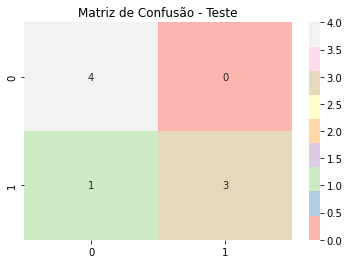

In [ ]:
# Matriz de confusão
import seaborn as sn
from sklearn.metrics import confusion_matrix

df_confusion = confusion_matrix(labels_test, y_pred)

plt.title("Matriz de Confusão - Teste")
sn.heatmap(df_confusion, cmap=plt.cm.Pastel1, annot=True)
plt.show()

**c)** Tente plotar os resultados da classificação usando os atributos 2 a 2 como eixos. Utilize a função [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) do matplotlib, já demonstrada no início da Parte 3 deste notebook. As amostras de treinamento devem ser plotadas com pontos circulares, enquanto as amostras de teste devem ser plotadas com pontos cruzados. Comente os resultados obtidos.


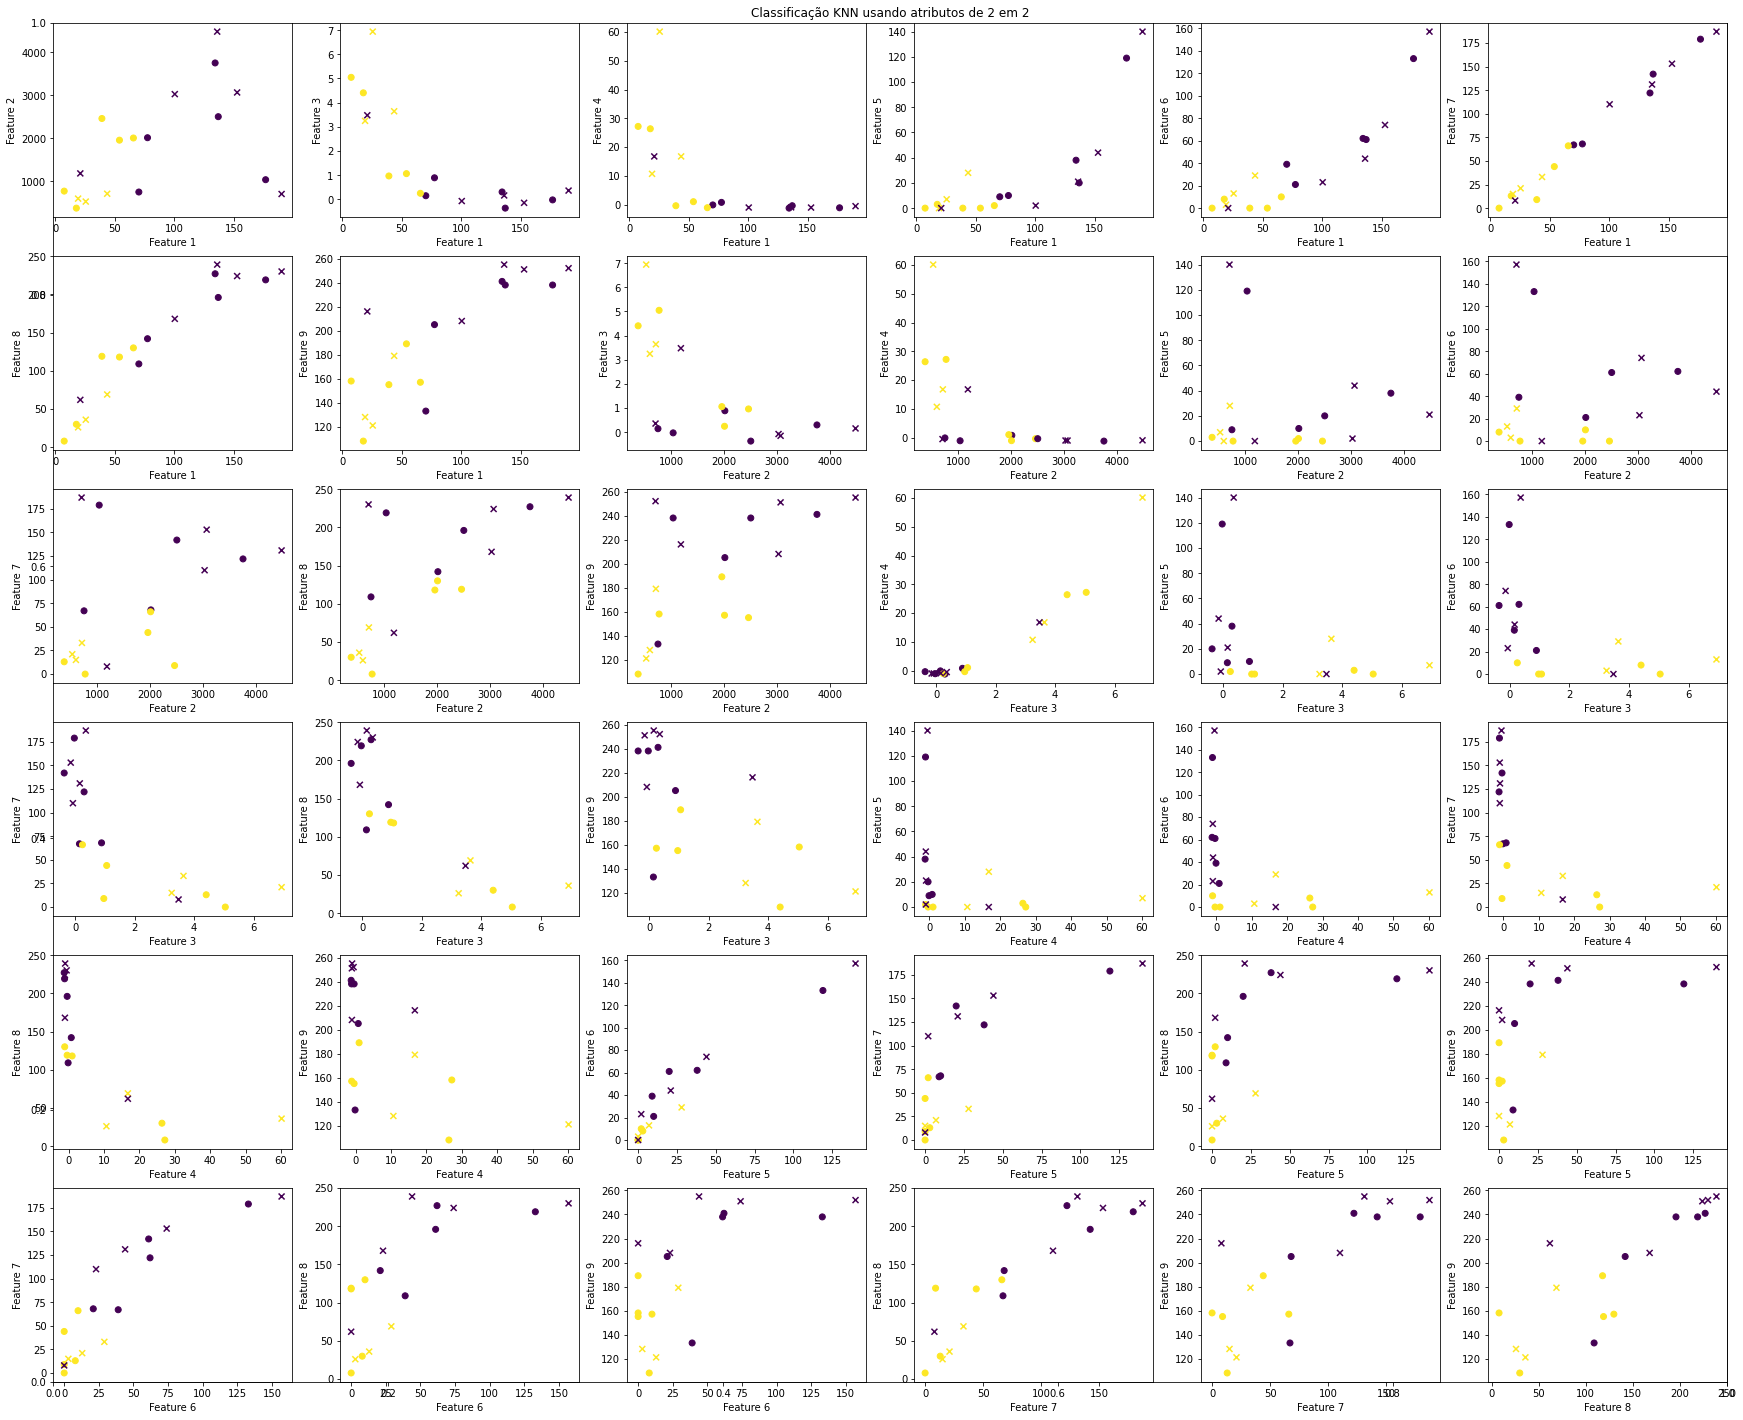

In [ ]:
# Transforma os vetores de atributo em array
train_features = np.array(train_features)
test_features = np.array(test_features)

# variaveis para auxiliar o plot
tam = np.shape(train_features[1])[0]
count = 0

# Plotando os resultados
figura = plt.figure(figsize=(30,25))
plt.title('Classificação KNN usando atributos de 2 em 2')
for c in range(tam):
  for d in range(tam):
    if c<d and c!=d:
      a = figura.add_subplot(6,6,count+1)
      plt.scatter(train_features[:, c], train_features[:, d], c=labels_train,)
      plt.scatter(test_features[:, c], test_features[:, d], marker='x', c=y_pred)
      plt.xlabel('Feature {}'. format(c+1))
      plt.ylabel('Feature {}'.format(d+1))
      count = count + 1
plt.show()

Comente os resultados obtidos: você está satisfeito com o resultado? o que você pode inferir do seu classificador ao observar as métricas obtidas? qual o erro mais frequente?

De modo geral o classificador obteve um bom desempenho, atingindo valores próximos ou maiores que 80%. No entando, pela analise das métricas, em especial do recall que teve o menor desempenho, percebe-se que ainda existe certa dificuldade do modelo em separar algumas imagens, classificando imagens de dia como noturnas (falso positivo). Além disso, através dos graficos de dispersão nota-se que algumas features não se diferenciam tanto entre as imagens, o que dificulta a classificação (em alguns casos não há uma fronteira clara de separação).

### Exercício 2.3.2

Tente melhorar os resultados de classificação, alterando os atributos extraídos. Algumas sugestões:

- redimensione as imagens para um tamanho menor **(64, 64)**, isso pode deixar os atributos menos suceptíveis a ruídos e detalhes, focando a classificação em características mais gerais;
- em problemas de classificação onde temos poucas amostras e muitos atributos, temos o "mal da dimensionalidade". Para fugir desse problema, faça uma seleção de atributos, ou seja, não utilize todos os atributos extraídos. Voê pode escolher os atributos aleatoriamente, pode fazer uma análise estatística dos atributos correlacionados, pode fazer uma análise visual. Pode também usar técnicas específicas de seleção de atributos ([feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)).
- altere o valor de vizinhos k;

In [ ]:
# Resize de todas as imagens --> (64x64)
lista_resize = []
for file in list_files:
  if file.endswith(".gif"):
    img = Image.open(files+file).convert('RGB')
  else:
    img = Image.open(files+file)
  img_resized = img.resize((64, 64))
  lista_resize.append(np.array(img_resized))

# Novos conjuntos de treino/teste
images_train_new = lista_resize[0:3]+ lista_resize[11:]
images_test_new =  lista_resize[3:11]

<Axes: title={'center': 'Matriz de Correlação - Treino'}>

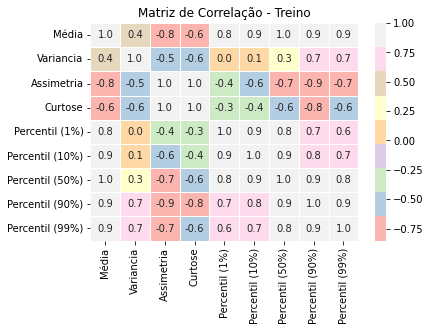

In [ ]:
# ESCOLHENDO ATRIBUTOS

# extrai atributos dos novos conjuntos de treino e teste
train_features_new = vetor_atributos(images_train_new)
test_features_new = vetor_atributos(images_test_new)

# cria dataframe com os atributos para facilitar a seleção dos atributos com maior correlação entre sí
atributo_treino = pd.DataFrame(train_features_new, columns=atributos)
atributo_teste = pd.DataFrame(test_features_new, columns=atributos)

correlation = atributo_treino.corr() # correlaciona os atributos

# plot da matriz de correlação --> matriz treino
plt.title('Matriz de Correlação - Treino')
plot = sn.heatmap(correlation, cmap=plt.cm.Pastel1, annot = True, fmt=".1f", linewidths=.6)
plot

In [ ]:
# Seleciona os atributos de acordo com a correlação entre eles
# Percebe-se por meio da matriz de correlação que as features Média, Percentil (50%) e Percentil (90%) possuem uma alta correlação entre sí.
# Assim, foram extraidos apenas essas três features para o treinamento da rede

# Concatenação das features para Treino
train_features_reduzido = pd.concat([atributo_treino[0], atributo_treino[6]], axis=1)
train_features_reduzido = pd.concat([train_features_reduzido, atributo_treino[7]], axis=1)

# Concatenação das features para Teste
test_features_reduzido = pd.concat([atributo_teste[0], atributo_teste[6]], axis=1)
test_features_reduzido = pd.concat([test_features_reduzido, atributo_teste[7]], axis=1)

In [ ]:
# Criando o modelo KNN
# Note que o mesmo valor de k foi mantido, pois há um número razo de amostras e k=3 parece um valor bom dentro de uma quantidade de 10 amostras
model_novo = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
model_novo.fit(train_features_reduzido, labels_train)

# Classificando as amostras
y_pred_novo = model_novo.predict(test_features_reduzido)

In [ ]:
# Calcula as métricas tanto para o conjunto de treino quanto para teste
def metricas(X, y):
  desempenho = []

  acc = accuracy_score(y, model_novo.predict(X))
  prec = precision_score(y, model_novo.predict(X))
  rec = recall_score(y, model_novo.predict(X))
  f1 = f1_score(y, model_novo.predict(X))

  desempenho.append(acc)
  desempenho.append(prec)
  desempenho.append(rec)
  desempenho.append(f1)

  return desempenho


desempenho_treino_novo = metricas(train_features_reduzido, labels_train)
desempenho_teste_novo = metricas(test_features_reduzido, labels_test)

# plota gráfico comparativo entre as métricas
metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
metrica_1_novo = pd.DataFrame(desempenho_treino_novo, columns=['Treino'])
metrica_2_novo = pd.DataFrame(desempenho_teste_novo, columns=['Teste'])
metrica_3_novo = pd.DataFrame(metricas, columns=[''])
df = pd.concat([metrica_1_novo, metrica_2_novo], axis=1)
df = pd.concat([metrica_3_novo, df], axis=1)
df

,,Treino,Teste
0,Acurácia,0.8,1.0
1,Precisão,0.8,1.0
2,Recall,0.8,1.0
3,F1-Score,0.8,1.0


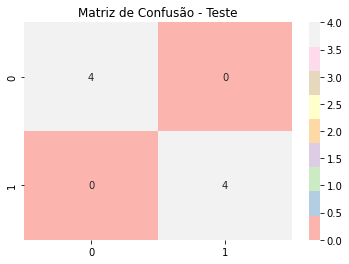

In [ ]:
# Matriz de confusão para o modelo retreinado e ajustado
# De fato, a mudança do tamanho das imagens e a escolha de atributos com maior correlação entre sí colaboraram para a melhora do classificador
df_confusion_novo = (confusion_matrix(labels_test, y_pred_novo))

plt.title("Matriz de Confusão - Teste")
sn.heatmap(df_confusion_novo, cmap=plt.cm.Pastel1, annot=True)
plt.show()